In [1]:
import numpy as np 
import pylab as pl 
import pandas as pd 
import glob
import os
import seaborn as sns
%matplotlib inline 

In [2]:
sns.set_style("darkgrid", {"axes.facecolor": ".94"})
sns.set_palette(sns.color_palette("hls", 17))

In [3]:
path = "results/"                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f,sep = '\t') for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df.head()

,Unnamed: 0,background_estimate,dataset_id,decay_fit_pars,decay_reduced_chi_sq,decay_slope,decay_slope_err,fall_idx,peak_flux,peak_idx,rise_fit_pars,rise_idx,rise_reduced_chi_sq,rise_slope,rise_slope_err,target_class,trigger_idx
0,0,31.411086,3C273,NaN,NaN,NaN,NaN,27.0,38.527551,23.0,"[1.0, 1.0, 1.0, 1.0]",22.0,NaN,1.0,inf,BLAZAR,23.0
1,1,31.411086,3C273,NaN,NaN,NaN,NaN,29.0,38.526088,28.0,NaN,27.0,NaN,NaN,NaN,BLAZAR,28.0
2,2,31.411086,3C273,NaN,NaN,NaN,NaN,90.0,40.102408,70.0,"[1.0, 1.0, 1.0, 1.0]",54.0,NaN,1.0,inf,BLAZAR,55.0
3,3,31.411086,3C273,NaN,NaN,NaN,NaN,179.0,44.404363,141.0,"[1.0, 1.0, 1.0, 1.0]",122.0,NaN,1.0,inf,BLAZAR,126.0
4,4,31.411086,3C273,NaN,NaN,NaN,NaN,214.0,40.499268,203.0,"[1.0, 1.0, 1.0, 1.0]",193.0,NaN,1.0,inf,BLAZAR,195.0


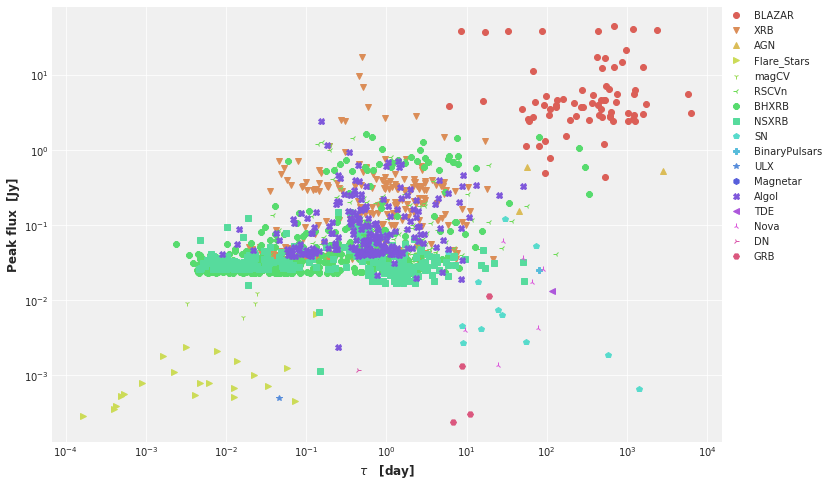

In [6]:
classes = df.target_class.unique()
markers = ["o","v","^",">","1","3","8","s","p","P","*","h","X","<","2","4","H"]
pl.figure(figsize = [12,8])
for i in range(len(classes)):
    rise_slope = df.loc[(df["target_class"] == classes[i]), "rise_slope"]
    peak_flux = df.loc[df["target_class"] == classes[i], "peak_flux"]
    pl.plot(1/rise_slope,peak_flux,marker = markers[i],linestyle = "",label = classes[i])

pl.xlabel(r'$\tau$   [day]',fontsize=12,fontweight='bold')
pl.ylabel("Peak flux  [Jy]",fontsize=12,fontweight='bold')
pl.xscale("log")
pl.yscale("log")
lgd = pl.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pl.savefig('fluxVstau.png',bbox_extra_artists=(lgd,), bbox_inches='tight')
pl.show()


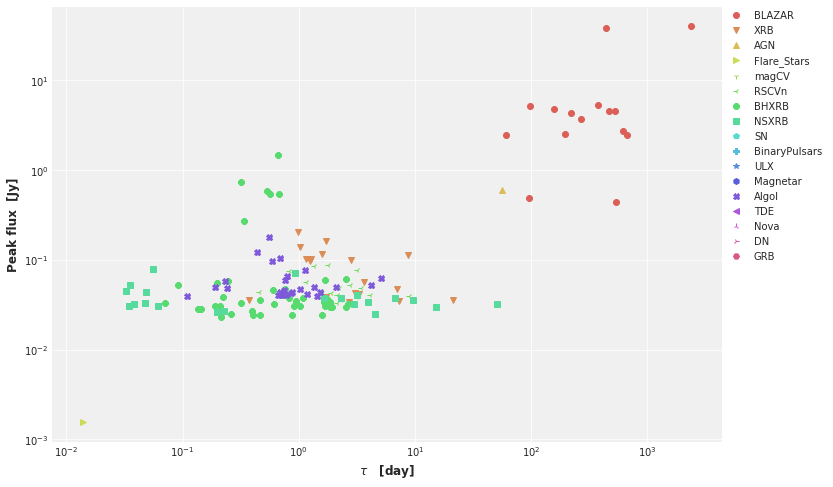

Series([], Name: rise_slope, dtype: float64)

In [10]:
pl.figure(figsize = [12,8])
chi_squared_cut = 
for i in range(len(classes)):
    rise_slope = df.loc[(df["target_class"] == classes[i]) &  (df["rise_reduced_chi_sq"]<chi_squared_cut) &  (df["rise_reduced_chi_sq"]>0), "rise_slope"]
    peak_flux = df.loc[(df["target_class"] == classes[i]) &  (df["rise_reduced_chi_sq"]<chi_squared_cut) &  (df["rise_reduced_chi_sq"]>0), "peak_flux"]
    pl.plot(1/rise_slope,peak_flux,marker = markers[i],linestyle = "",label = classes[i])

pl.xlabel(r'$\tau$   [day]',fontsize=12,fontweight='bold')
pl.ylabel("Peak flux  [Jy]",fontsize=12,fontweight='bold')
pl.xscale("log")
pl.yscale("log")
lgd = pl.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
pl.show()
rise_slope

In [98]:
rise_slope = df.loc[(df["target_class"] == classes[i]) &  (df["rise_reduced_chi_sq"]<20), "rise_slope"]


911     0.113559
950     0.090802
1170    0.146044
1172    0.052475
Name: rise_slope, dtype: float64

(-10, 100)

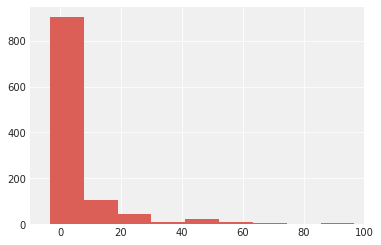

In [91]:
chisq_rise = df.rise_reduced_chi_sq.replace([np.inf, -np.inf], np.nan).dropna()
pl.hist(chisq_rise,bins=300)
pl.xlim(-10,100)

In [6]:
df

,Unnamed: 0,background_estimate,dataset_id,decay_fit_pars,decay_reduced_chi_sq,decay_slope,decay_slope_err,fall_idx,peak_flux,peak_idx,rise_fit_pars,rise_idx,rise_reduced_chi_sq,rise_slope,rise_slope_err,target_class,trigger_idx
0,0,31.411086,3C273,NaN,NaN,NaN,NaN,27.0,38.527551,23.0,"[1.0, 1.0, 1.0, 1.0]",22.0,NaN,1.000000,inf,BLAZAR,23.0
1,1,31.411086,3C273,NaN,NaN,NaN,NaN,29.0,38.526088,28.0,NaN,27.0,NaN,NaN,NaN,BLAZAR,28.0
2,2,31.411086,3C273,NaN,NaN,NaN,NaN,90.0,40.102408,70.0,"[1.0, 1.0, 1.0, 1.0]",54.0,NaN,1.000000,inf,BLAZAR,55.0
3,3,31.411086,3C273,NaN,NaN,NaN,NaN,179.0,44.404363,141.0,"[1.0, 1.0, 1.0, 1.0]",122.0,NaN,1.000000,inf,BLAZAR,126.0
4,4,31.411086,3C273,NaN,NaN,NaN,NaN,214.0,40.499268,203.0,"[1.0, 1.0, 1.0, 1.0]",193.0,NaN,1.000000,inf,BLAZAR,195.0
5,5,31.411086,3C273,NaN,NaN,NaN,NaN,217.0,38.722762,216.0,NaN,215.0,NaN,NaN,NaN,BLAZAR,216.0
6,6,31.411086,3C273,NaN,NaN,NaN,NaN,239.0,37.910603,236.0,"[1.0, 1.0, 1.0, 1.0]",235.0,NaN,1.000000,inf,BLAZAR,236.0
7,7,31.411086,3C273,NaN,NaN,NaN,NaN,252.0,38.411695,245.0,"[1.0, 1.0, 1.0, 1.0]",240.0,NaN,1.000000,inf,BLAZAR,245.0
8,0,0.123077,NGC7213,NaN,NaN,NaN,NaN,38.0,0.155385,34.0,"[1.0, 1.0, 1.0, 1.0]",31.0,NaN,1.000000,inf,AGN,32.0
9,0,7.686988,3C454.3,NaN,NaN,NaN,NaN,27.0,17.261127,15.0,"[1.0, 1.0, 1.0, 1.0]",7.0,NaN,1.000000,inf,BLAZAR,9.0


0.14112000805986721

In [39]:
b = 1.0
c = [1.0]
a = np.resize(0.85,12)
for i in a:
    c.append(np.sum(c)/i)

In [40]:
np.sum(c)

11298.834107569444